<a href="https://colab.research.google.com/github/cagBRT/Machine-Learning/blob/master/FeatureSelection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we learn methods for selecting features.

In [ ]:
# Clone the entire repo.
!git clone -l -s https://github.com/cagBRT/Machine-Learning.git cloned-repo
%cd cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 1781, done.
remote: Counting objects: 100% (567/567), done.
remote: Compressing objects: 100% (279/279), done.
remote: Total 1781 (delta 334), reused 481 (delta 288), pack-reused 1214
Receiving objects: 100% (1781/1781), 60.57 MiB | 16.96 MiB/s, done.
Resolving deltas: 100% (1083/1083), done.
Updating files: 100% (156/156), done.
/content/cloned-repo


In [ ]:
from IPython.display import Image
def page(num):
    return Image("images/fs"+str(num)+ ".png" , width=640)

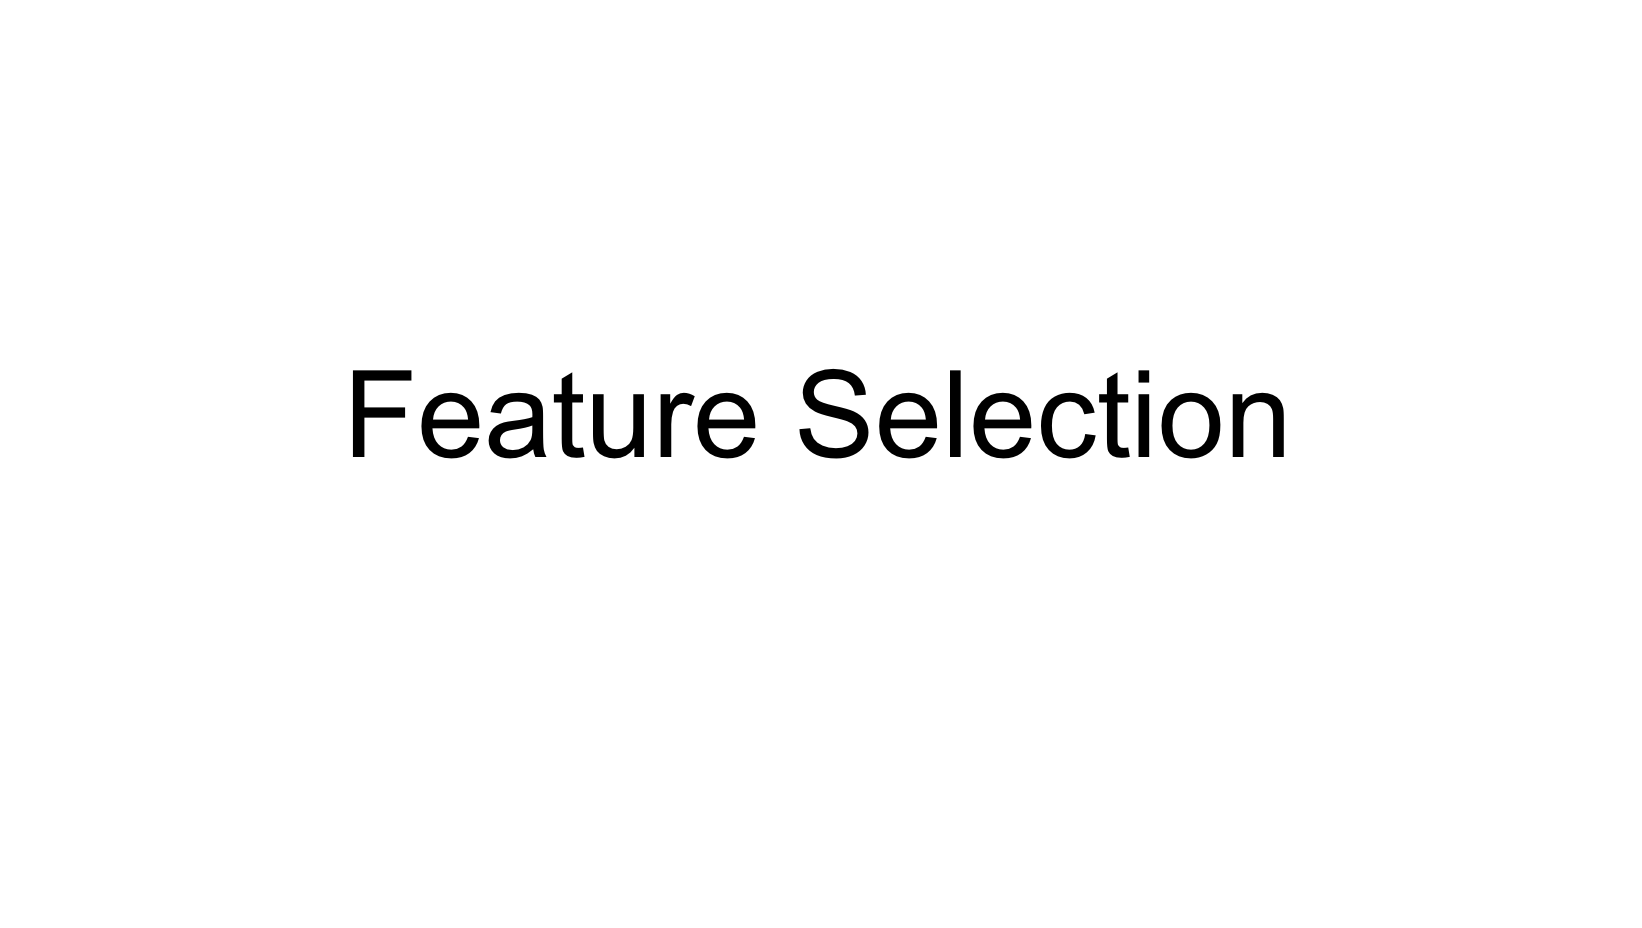

In [ ]:
page(1)

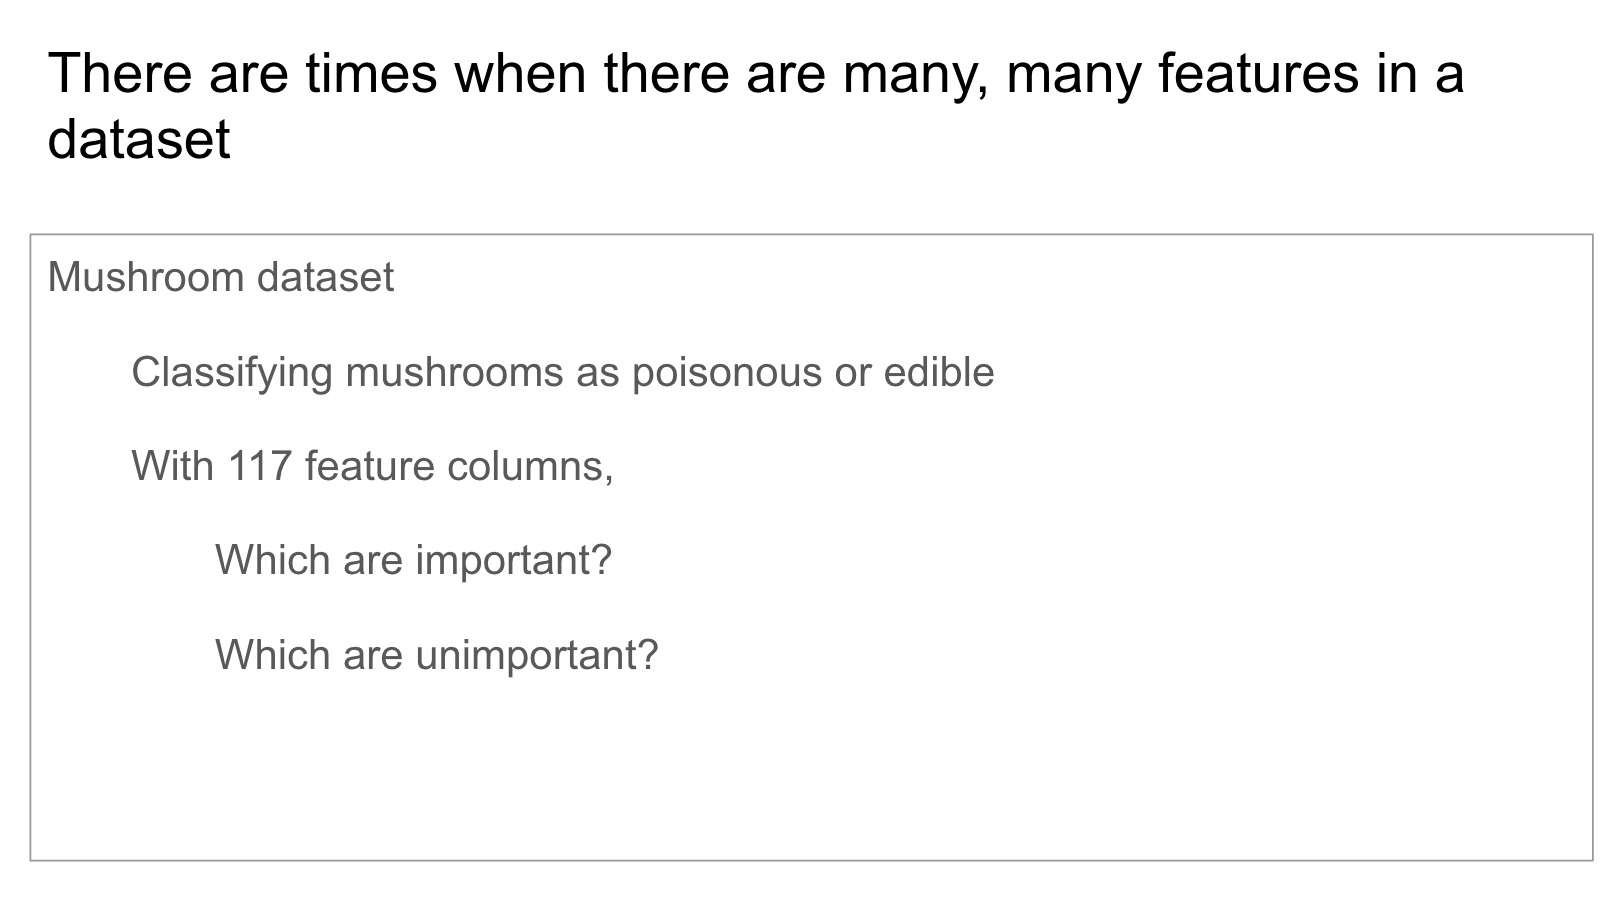

In [ ]:
page(2)

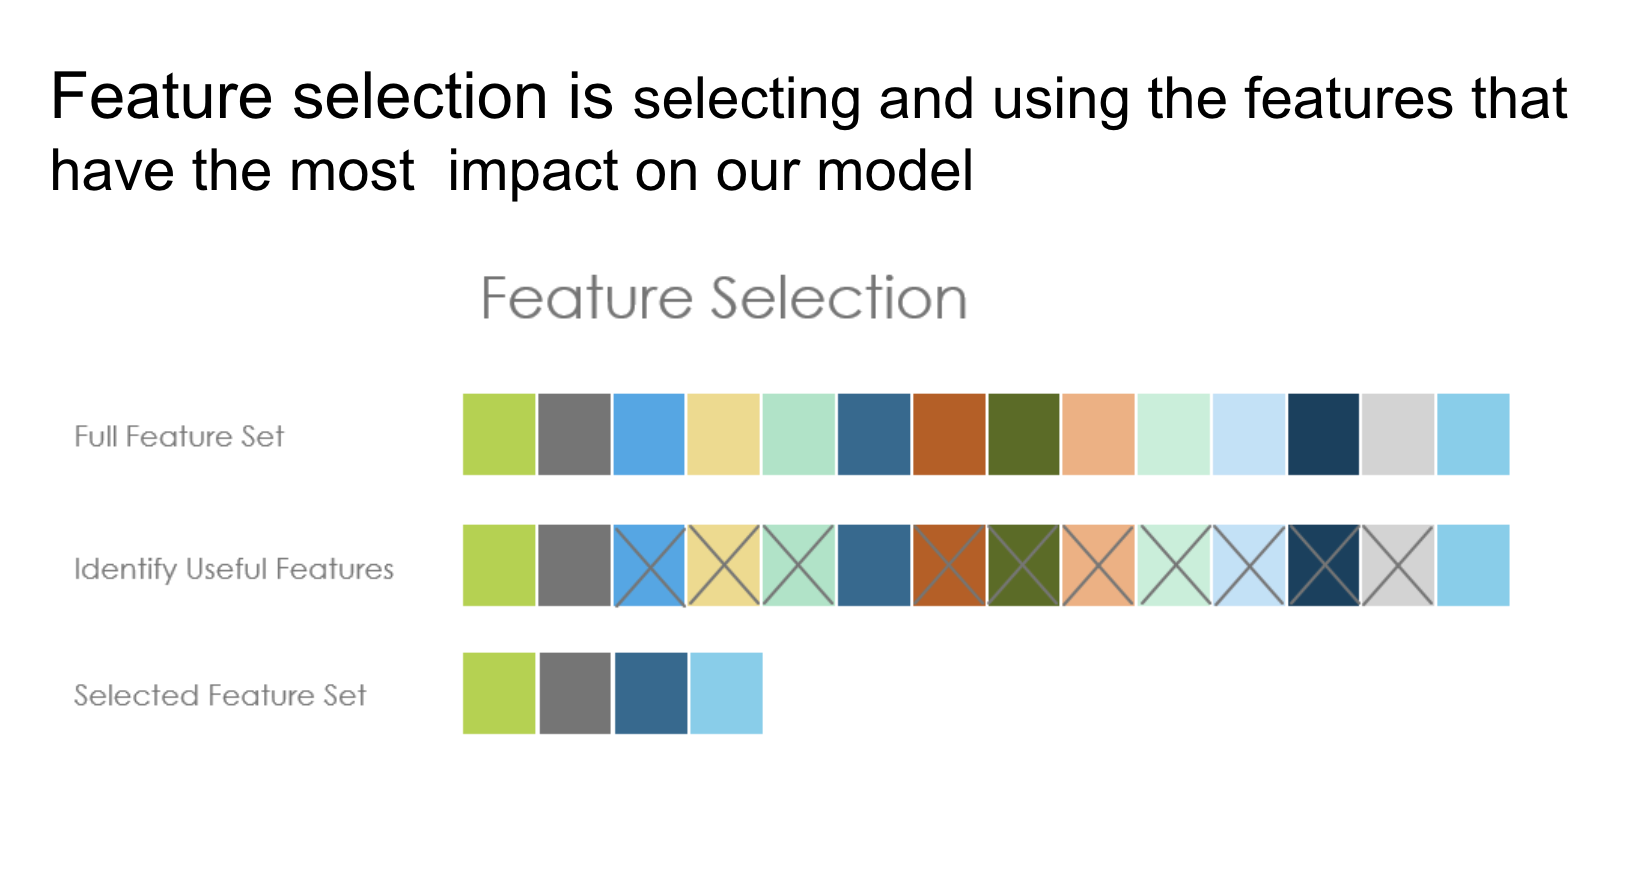

In [ ]:
page(3)

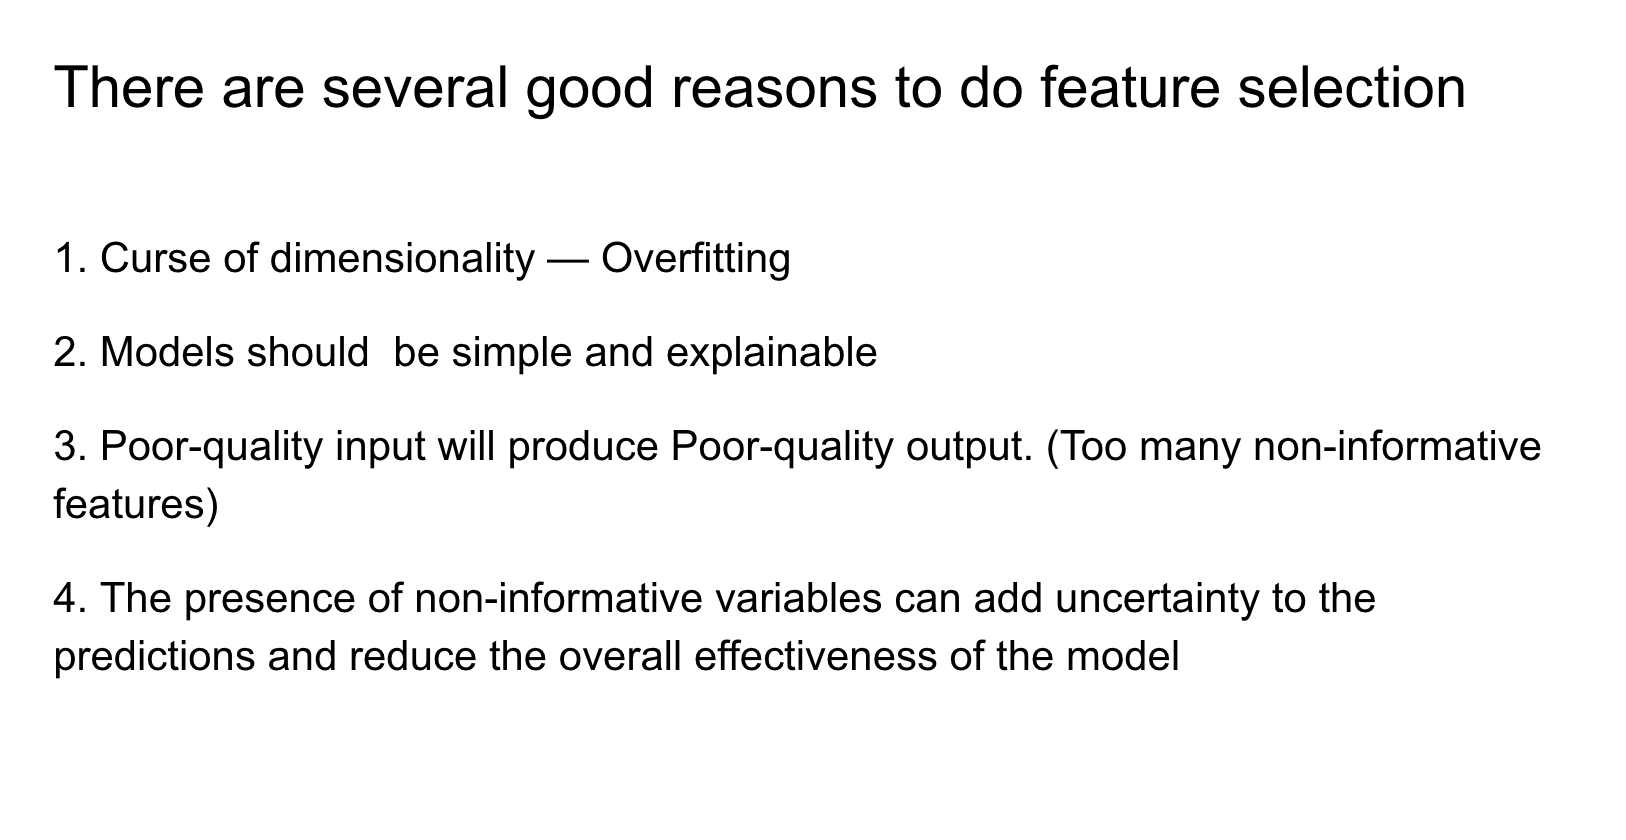

In [ ]:
page(4)

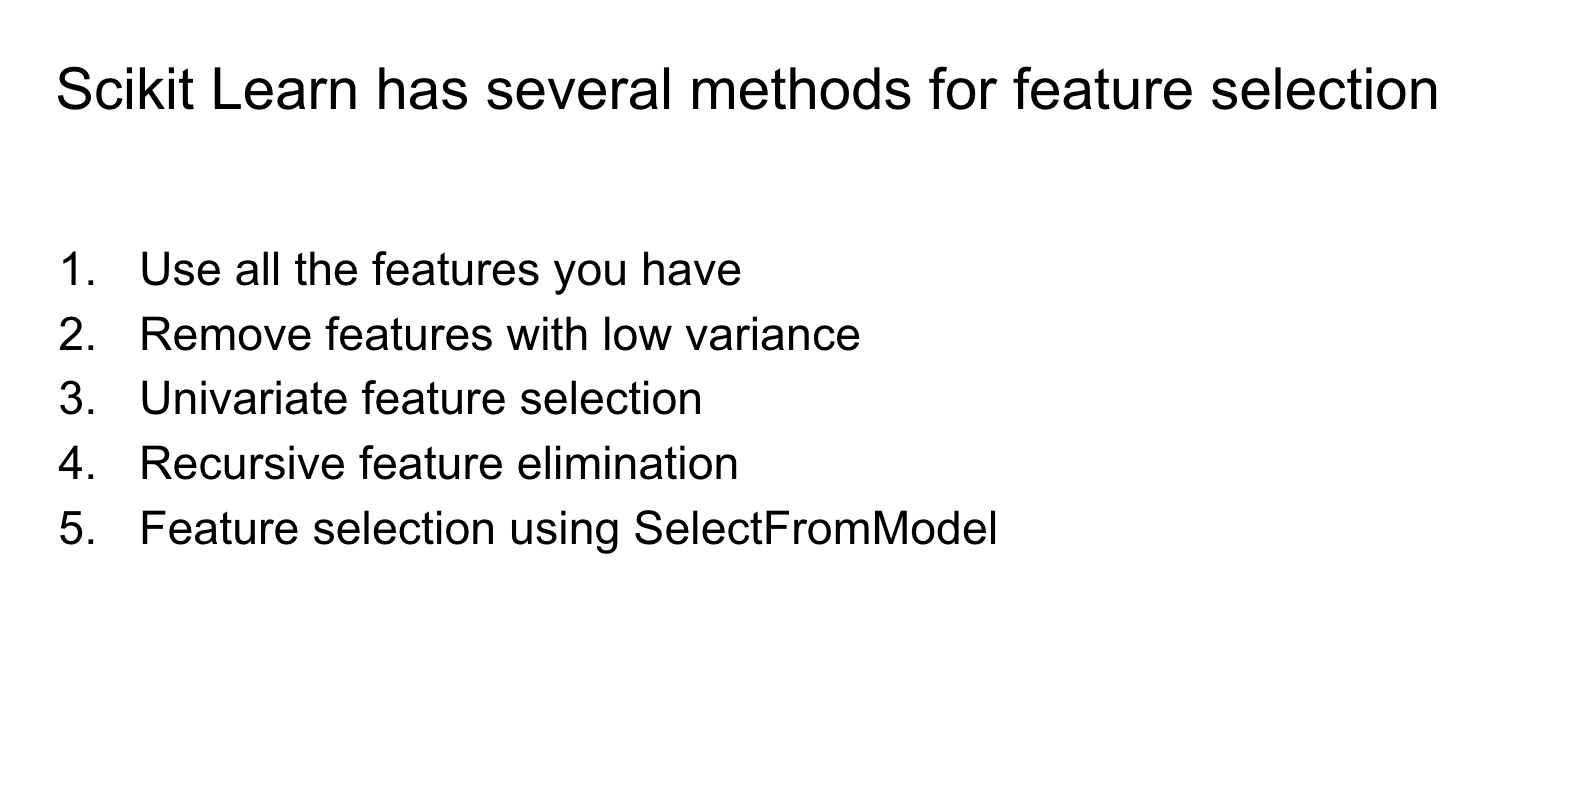

In [ ]:
page(5)

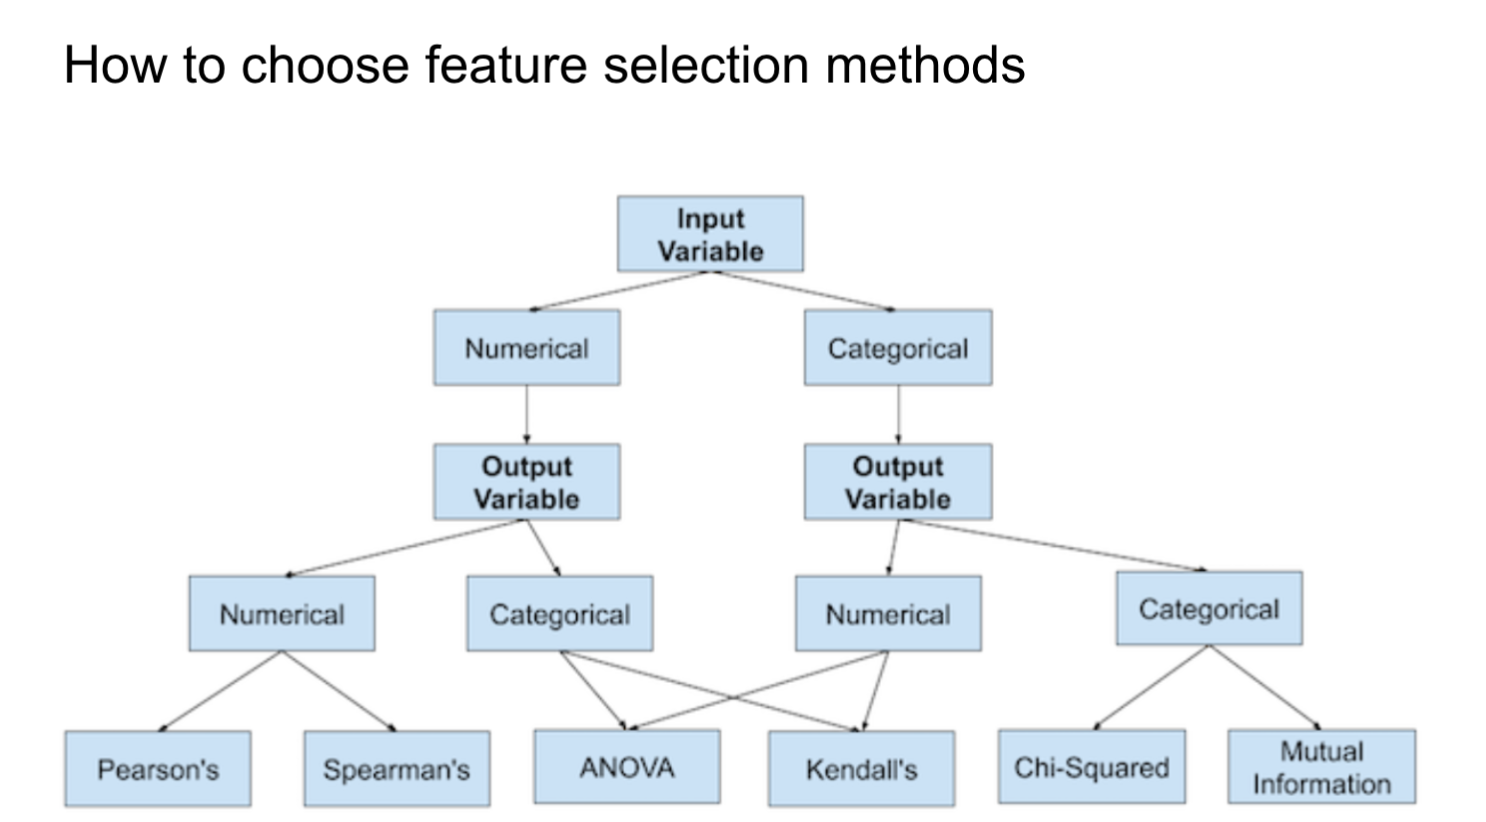

In [ ]:
Image("images/selection methods.png" , width=640)

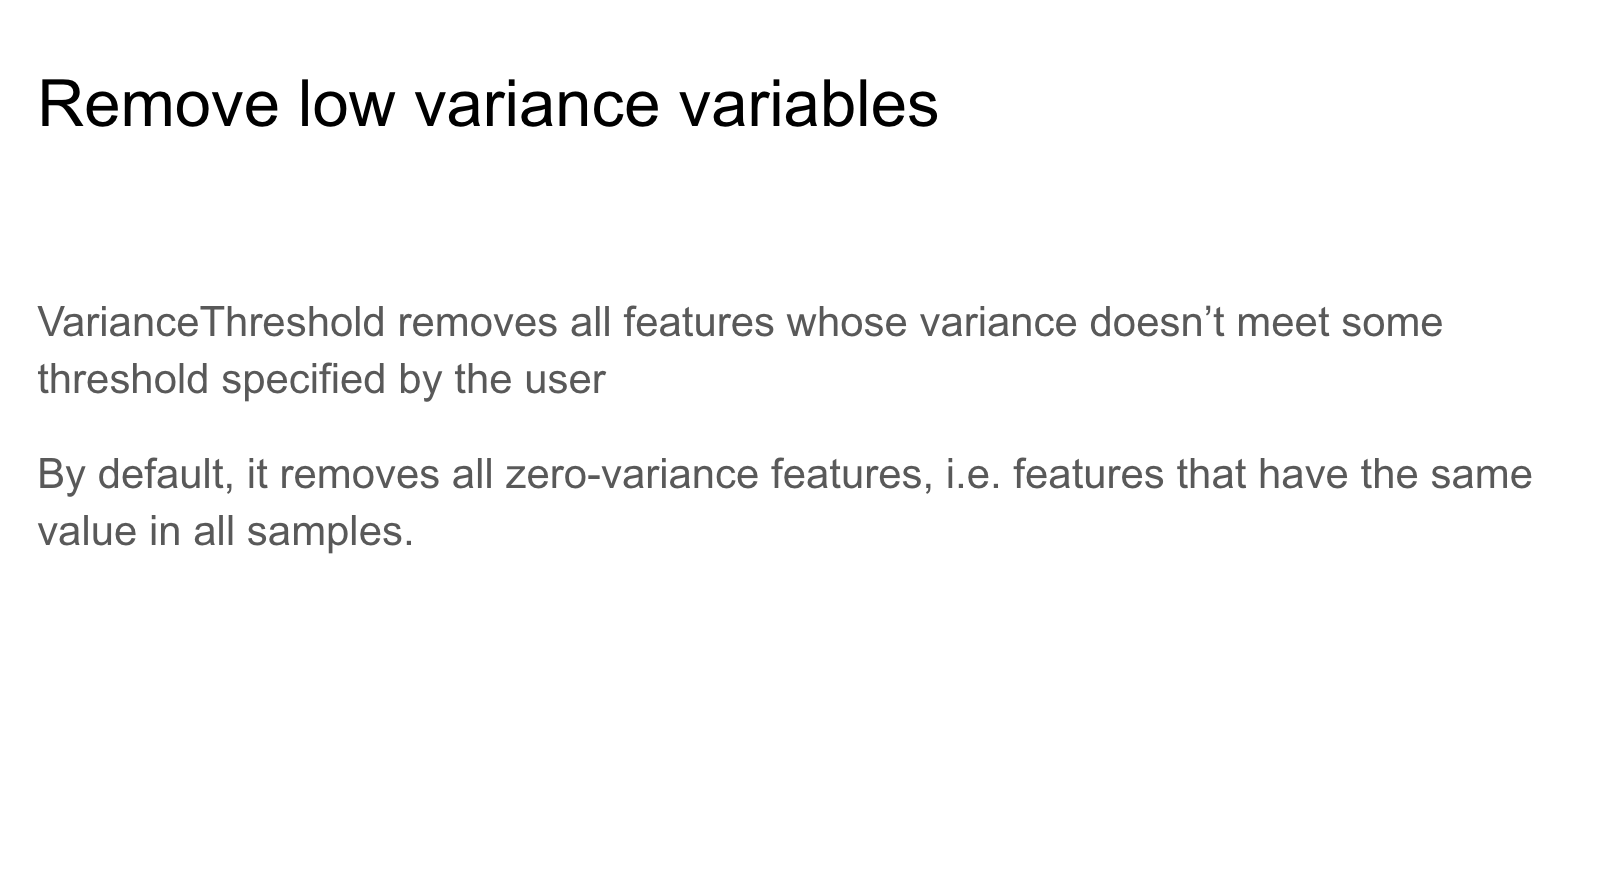

In [ ]:
page(6)

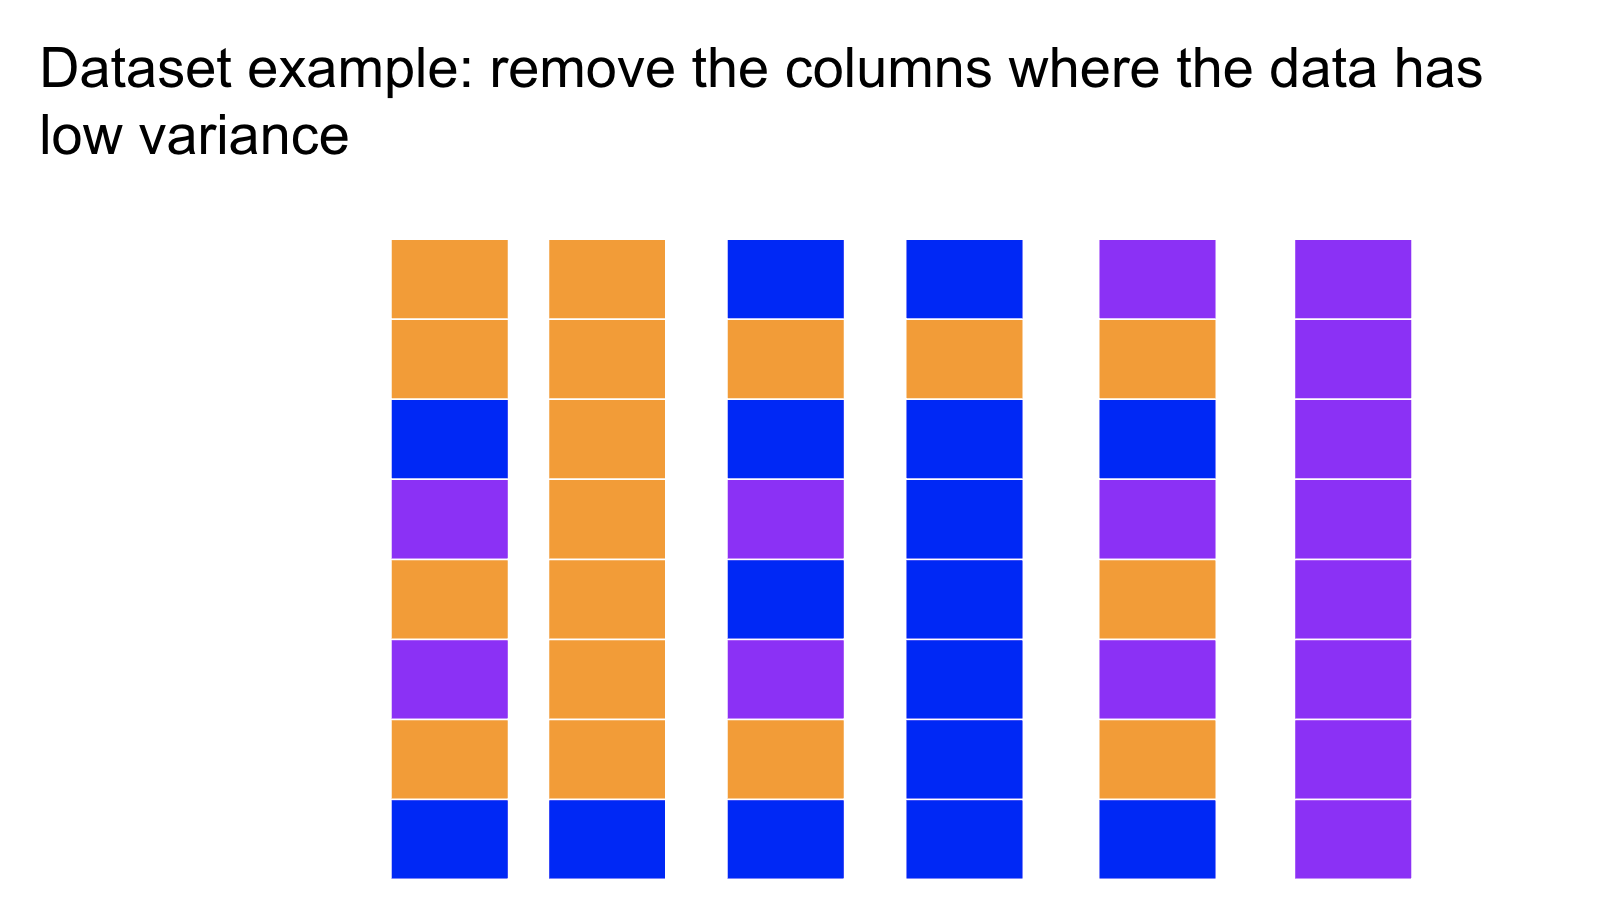

In [ ]:
page(7)

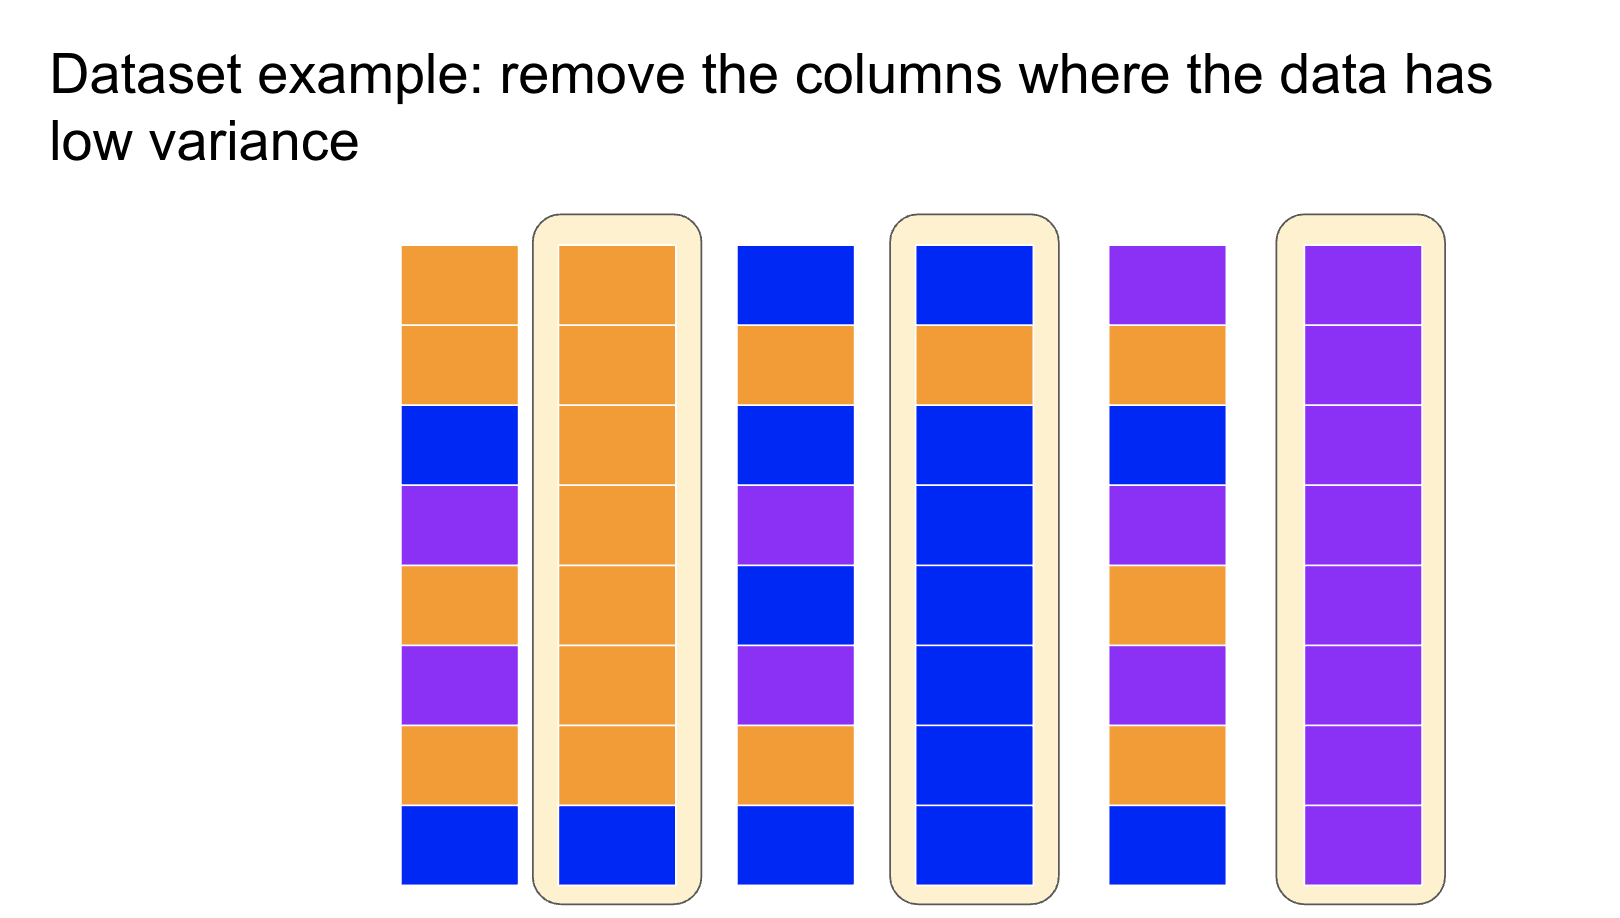

In [ ]:
page(8)

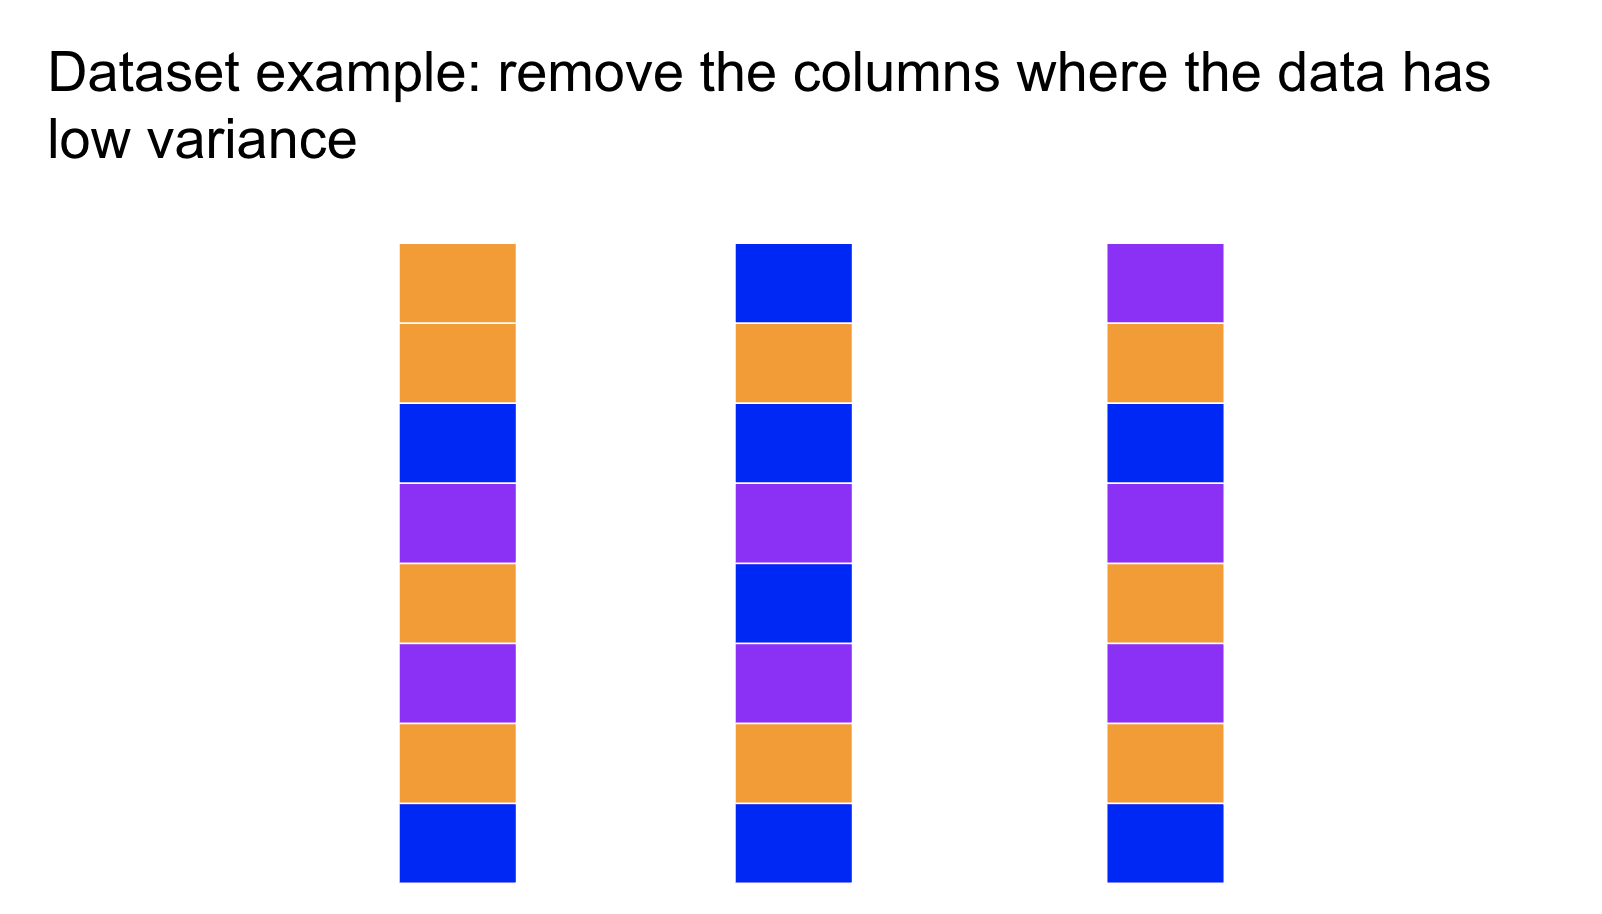

In [ ]:
page(9)

# **Remove features with low variance**

As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Any data where 80% of the data is the same is considered low variance data. <br>

Features with a training-set variance lower than this threshold will be removed. <br>
**The default is to keep all features with non-zero variance**, i.e. remove the features that have the same value in all samples.


Create a datasest with 3 features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
print(X)

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]


Remove all variables where the variance does not meet the threshold

As expected, VarianceThreshold has removed the first column,
which had 0,0,1,0,0,0 <br>
There is very little variance in this column, so it will not add much information for our model to use when making predictions. So remove this column.  

In [ ]:
sel = VarianceThreshold(threshold=(0.16))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

# **Assignment 1**
Remove any low variance data from the given dataset.<br>
<br>
[[0,1,2,0,2],[2,2,1,0,1],[1,1,1,0,1],[0,2,1,0,0],[2,1,1,0,0],[1,1,2,0,0],[2,2,0,0,1],[1,0,1,0,1],[0,2,1,0,1],[2,1,1,1,0],[0,1,1,0,2],[1,2,0,0,1],[2,1,1,2,1],[2,0,1,0,1]]

1. Find the lowest threshold that still produces a change in the dataset
2. Find the threshold to remove a second feature column

In [ ]:
#@title
#Assignment 1
xx = [[0,1,2,0,2],[2,2,1,0,1],[1,1,1,0,1],[0,2,1,0,0],[2,1,1,0,0],[1,1,2,0,0],
      [2,2,0,0,1],[1,0,1,0,1],[0,2,1,0,1],[2,1,1,1,0],[0,1,1,0,2],[1,2,0,0,1],
      [2,1,1,2,1],[2,0,1,0,1]]
sel = VarianceThreshold(threshold=(0.3))
sel.fit_transform(xx)

array([[0, 1, 0, 2],
       [2, 2, 0, 1],
       [1, 1, 0, 1],
       [0, 2, 0, 0],
       [2, 1, 0, 0],
       [1, 1, 0, 0],
       [2, 2, 0, 1],
       [1, 0, 0, 1],
       [0, 2, 0, 1],
       [2, 1, 1, 0],
       [0, 1, 0, 2],
       [1, 2, 0, 1],
       [2, 1, 2, 1],
       [2, 0, 0, 1]])

# **Univariate feature selection**

Univariate feature selection works by selecting the best features based on univariate statistical tests. We compare each feature to the target variable, to see whether there is any statistically significant relationship between them. It is also called analysis of variance (ANOVA).<br><br>
Used for supervised learning

>SelectKBest removes all but the k highest scoring features<br>
<br>
SelectPercentile removes all but a user-specified highest scoring percentage of features<br>
<br>
Uses common univariate statistical tests for each feature:<br>
* false positive rate SelectFpr<br>
* false discovery rate SelectFdr<br>
* family wise error SelectFwe<br>
* genericUnivariateSelect - selects the best strategy with a hyper parameter search estimator

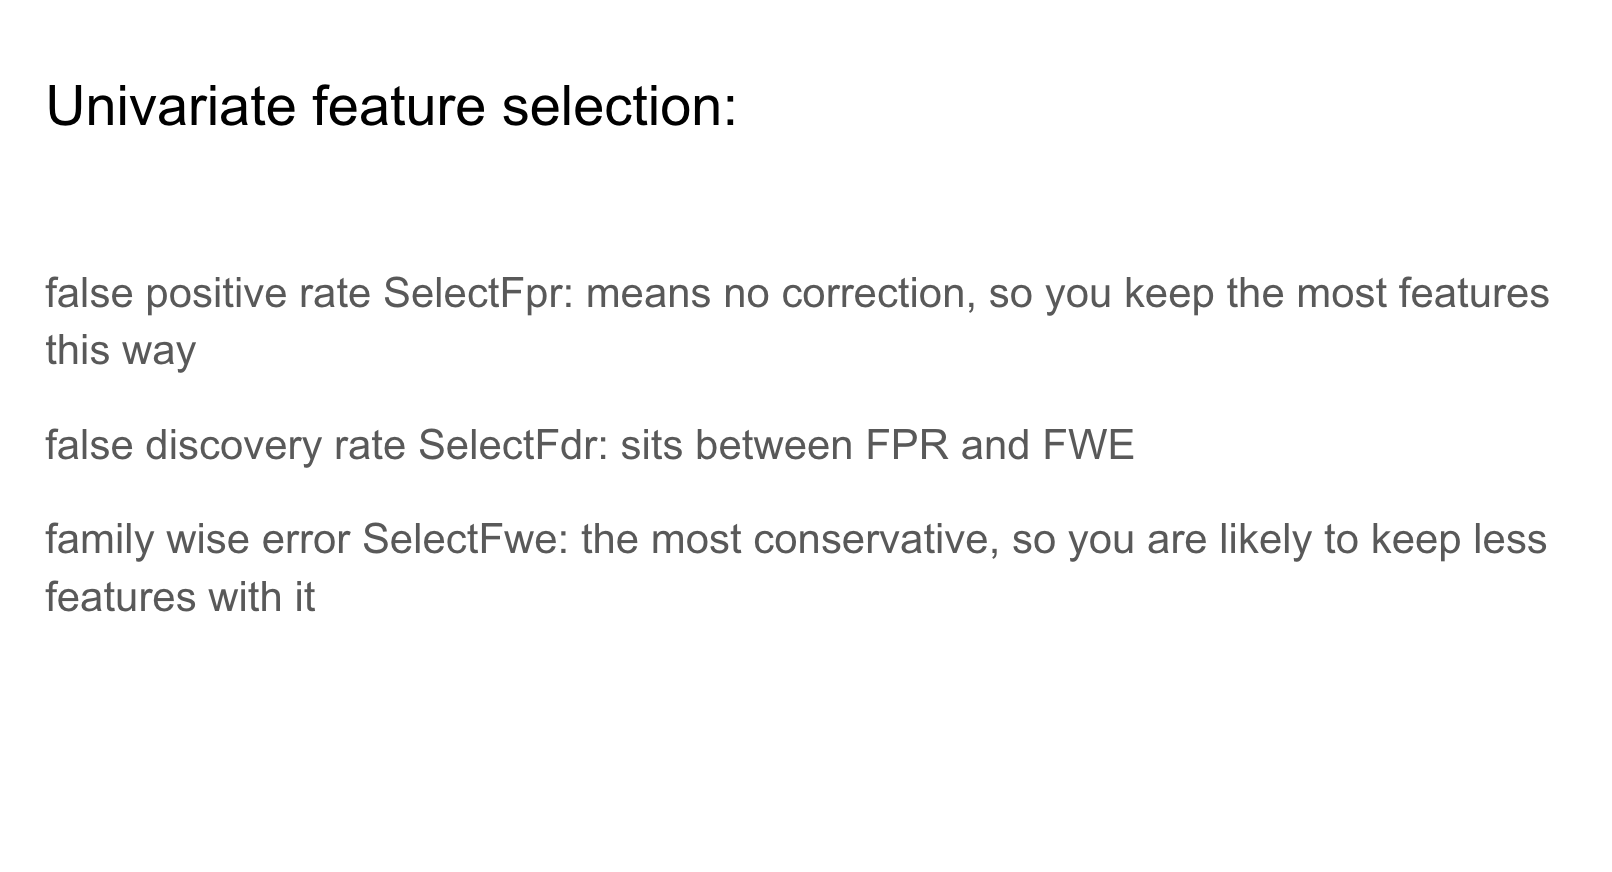

In [ ]:
page(13)

**Example 1:**

SelectKBest removes all but the *k* highest scoring features

Get the Iris dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

These functions take as input a scoring function that returns univariate scores and p-values (or only scores for SelectKBest and SelectPercentile)<br>
For regression use: f_regression, mutual_info_regression

For classification use: chi2, f_classif, mutual_info_classif
<br><br>
Then select the highest scoring features

In [ ]:
#Use chi2 to score the columns. Select the two columns that have the highest scores
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

**Example 2: Check model performance after variable selection**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

**Get data and add noise to the dataset**

As an experiment, use the Iris dataset, but add noise to it so that it has 24 features. <br>
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray<br>

The rows being the samples and the columns being: <br>
>Sepal Length <br>
Sepal Width <br>
Petal Length <br>
Petal Width<br>

In [ ]:
# Import the Iris dataset
Xin, y = load_iris(return_X_y=True)
iris = pd.DataFrame(Xin,y)

Notice the column names are 0,1,2,3<br>
The classes are the index. So to figure out the class of a row, look at the index.

In [ ]:
iris

,0,1,2,3
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2
...,...,...,...,...
2,6.7,3.0,5.2,2.3
2,6.3,2.5,5.0,1.9
2,6.5,3.0,5.2,2.0
2,6.2,3.4,5.4,2.3


Using the Pandas plot command

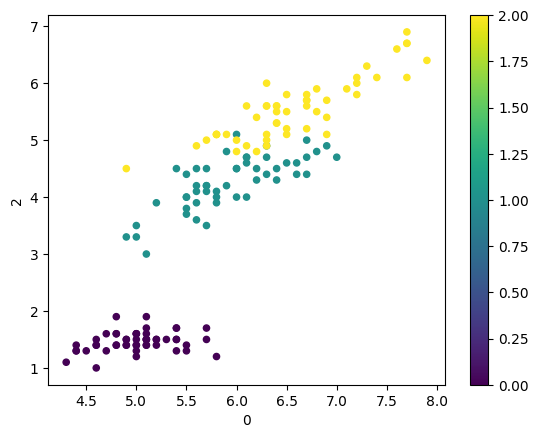

In [ ]:
ax1 = iris.plot.scatter(x=0, y=2, c=y, colormap='viridis')

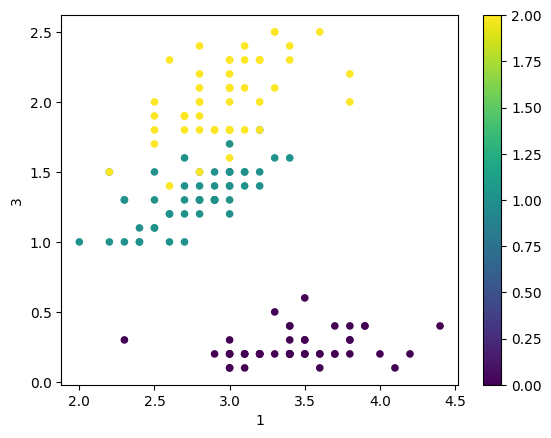

In [ ]:
ax2 = iris.plot.scatter(x=1, y=3, c=y, colormap='viridis')

In [ ]:
# Add some noisy data not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

# Add the noisy data to the informative features
#Stack arrays in sequence horizontally (column wise)
np.hstack(E)
X = np.hstack((X, E))
X.shape

(150, 24)

In [ ]:
#data row 0 with 20 columns of noise
X[0]

array([5.10000000e+00, 3.50000000e+00, 1.40000000e+00, 2.00000000e-01,
       3.74540119e-02, 9.50714306e-02, 7.31993942e-02, 5.98658484e-02,
       1.56018640e-02, 1.55994520e-02, 5.80836122e-03, 8.66176146e-02,
       6.01115012e-02, 7.08072578e-02, 2.05844943e-03, 9.69909852e-02,
       8.32442641e-02, 2.12339111e-02, 1.81824967e-02, 1.83404510e-02,
       3.04242243e-02, 5.24756432e-02, 4.31945019e-02, 2.91229140e-02])

**Do the train-test split**

In [ ]:
# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=0)

**Create an SVM model and train it on all the features**

In [ ]:
# Compare to the weights of an SVM
clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(X_test, y_test)))

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

Classification accuracy without selecting features: 0.789


**Create an SVM and train it with only the selected features**

In [ ]:
# #############################################################################
# Using the SelectKBest function, select the best 4 best features to keep
# #############################################################################
#For the ASSIGNMENT - change the k=4 to a different number
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

In [ ]:
clf_selected = make_pipeline(
        SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

Classification accuracy after univariate feature selection: 0.868


It is clear the model that used only the highest scoring SelectKBest values has a higher performance.

<Figure size 640x480 with 0 Axes>

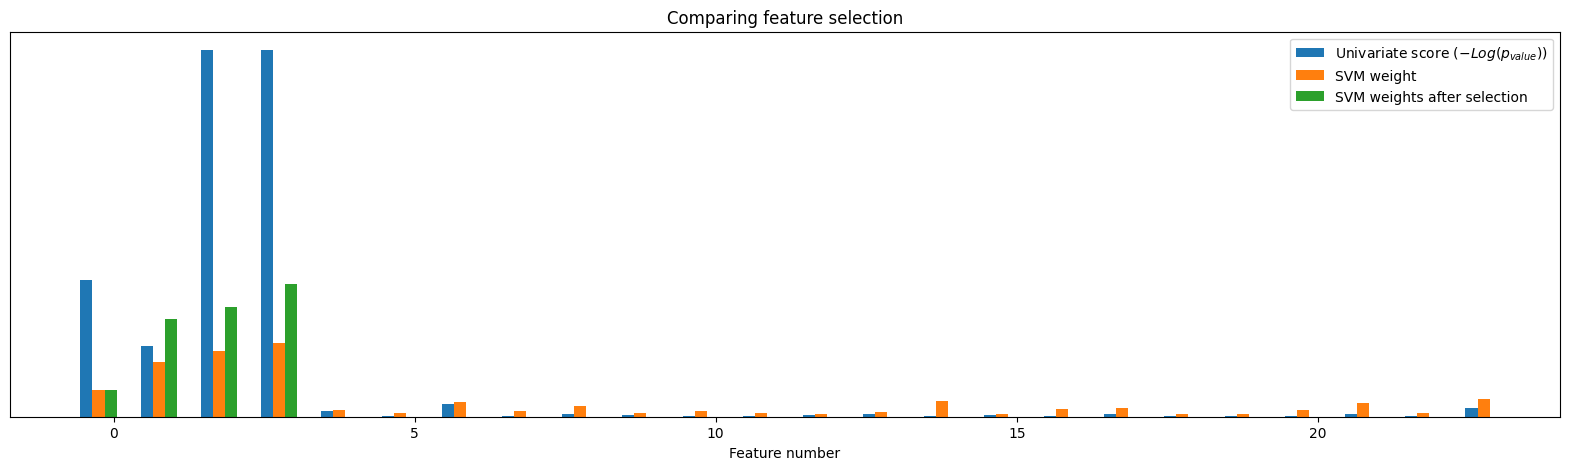

In [ ]:
X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.figure(figsize=(20,5))
plt.clf()

plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight')

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection')

plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

# **Assignment 2**
The plot above shows two of the univariate scores are much higher that the other scores. <br>
Train the model using only the two highest scores. <br>
Does the model performance get better or worse?

In [ ]:
#Assignment 2


# **Recursive feature elimination**

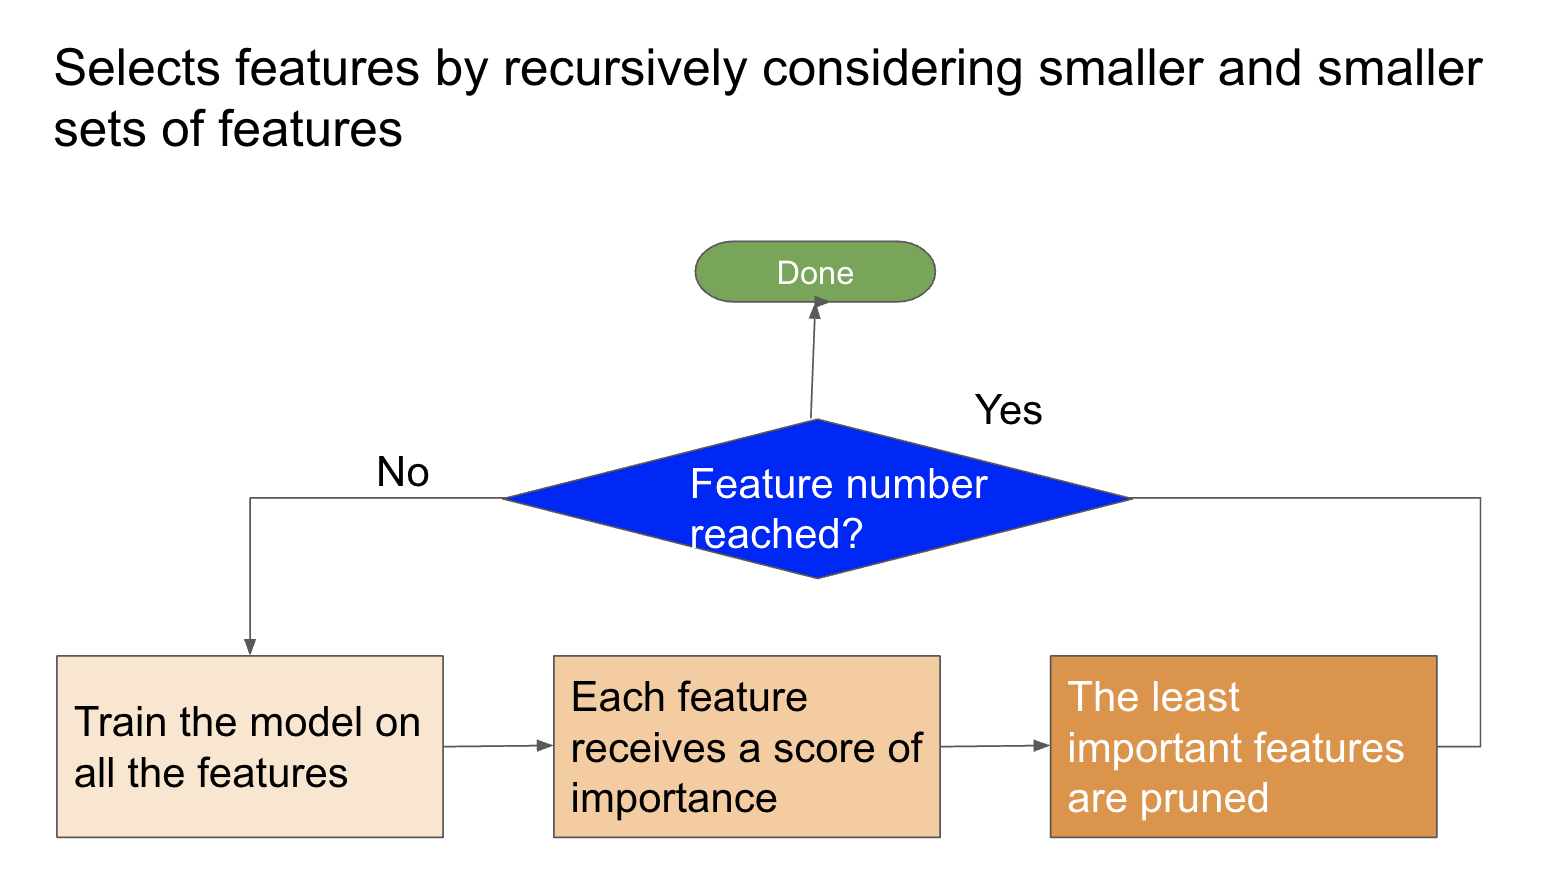

In [ ]:
page(14)

A recursive feature elimination example showing the relevance of pixels in a digit classification task

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

**Load the digits dataset (classification)**.<br>

Each datapoint is a 8x8 image of a digit.<br>
>Classes: 10<br>
>Samples per class: ~180<br>
>Samples total: 1797<br>
>Dimensionality: 64<br>
>Features: integers 0-9

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [ ]:
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

Look at one of the digits,

<Figure size 640x480 with 0 Axes>

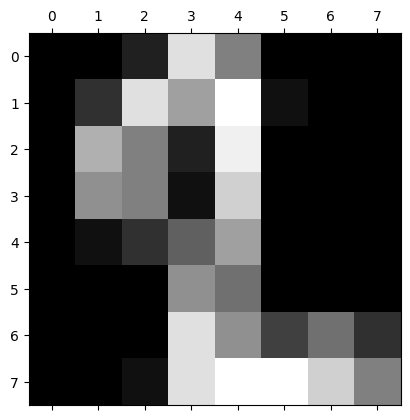

In [ ]:
choice = 567 #(0-1796)
plt.gray()
plt.matshow(digits.images[choice])
plt.show()

There are 64 pixels in the image. <br>
Which ones are important to the model and which ones can we prune?

In [ ]:
X[choice]

array([ 0.,  0.,  2., 14.,  8.,  0.,  0.,  0.,  0.,  3., 14., 10., 16.,
        1.,  0.,  0.,  0., 11.,  8.,  2., 15.,  0.,  0.,  0.,  0.,  9.,
        8.,  1., 13.,  0.,  0.,  0.,  0.,  1.,  3.,  6., 10.,  0.,  0.,
        0.,  0.,  0.,  0.,  9.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
        9.,  4.,  7.,  3.,  0.,  0.,  1., 14., 16., 16., 13.,  8.])

In [ ]:
y[choice]

2

Create the Recursive Feature Elimination (RFE) object and rank each pixel

In [ ]:
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

List the ranks assigned to each pixel. <br>
The higher the ranking corresponds to which should be pruned first.

In [ ]:
ranking

array([[64, 50, 31, 23, 10, 17, 34, 51],
       [57, 37, 30, 43, 14, 32, 44, 52],
       [54, 41, 19, 15, 28,  8, 39, 53],
       [55, 45,  9, 18, 20, 38,  1, 59],
       [63, 42, 25, 35, 29, 16,  2, 62],
       [61, 40,  5, 11, 13,  6,  4, 58],
       [56, 47, 26, 36, 24,  3, 22, 48],
       [60, 49,  7, 27, 33, 21, 12, 46]])

Plot pixel ranking

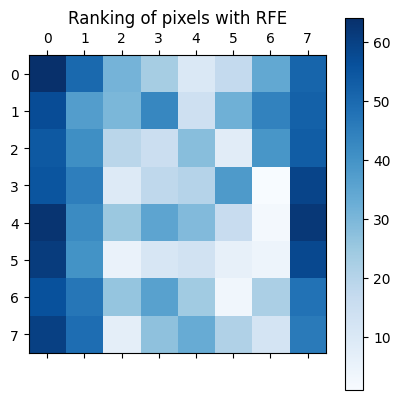

In [ ]:
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

# **Assignment 3**
Right now the model is saving only one pixel. Change the number of pixels saved to 48 pixels. <br>
Rerun the ranking of the pixels. <br>
Then run the code below.<br>
Which pixels were removed? <br>
After removing the pixels compare the performance of the reduced pixel images to the performance of the full image. <br>
How much of a difference is there in the accuracy scores?

The model with all but one feature removed.

In [ ]:
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1) #SELECT Different number of features
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)
print(ranking)

[[64 50 31 23 10 17 34 51]
 [57 37 30 43 14 32 44 52]
 [54 41 19 15 28  8 39 53]
 [55 45  9 18 20 38  1 59]
 [63 42 25 35 29 16  2 62]
 [61 40  5 11 13  6  4 58]
 [56 47 26 36 24  3 22 48]
 [60 49  7 27 33 21 12 46]]


In [ ]:
model = DecisionTreeClassifier()
#List of (name, transform) tuples (implementing fit/transform) that are chained,
#in the order in which they are chained, with the last object an estimator.
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(X, y)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.241 (0.037)


The model with all features used.

In [ ]:
model.fit(X, y)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.855 (0.024)


**RFE Example  2**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

**Create the data with 3 informative features and 25 features total**

In [ ]:
# Build a classification task using 3 informative features
X2, y2 = make_classification(n_samples=1000, n_features=25, n_informative=10,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

**Create the RFE object**<br>
Using a cross-validated score, recursively eliminate the less important features

In [ ]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X2, y2)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 10


In [ ]:
print(rfecv.cv_results_)

{'mean_test_score': array([0.189, 0.257, 0.339, 0.371, 0.443, 0.5  , 0.566, 0.585, 0.641,
       0.693, 0.692, 0.687, 0.662, 0.672, 0.667, 0.661, 0.657, 0.656,
       0.66 , 0.658, 0.639, 0.623, 0.621, 0.626, 0.631]), 'std_test_score': array([0.029, 0.029, 0.011, 0.011, 0.001, 0.012, 0.008, 0.011, 0.005,
       0.007, 0.006, 0.003, 0.012, 0.   , 0.001, 0.025, 0.015, 0.006,
       0.006, 0.012, 0.019, 0.011, 0.013, 0.014, 0.023]), 'split0_test_score': array([0.16 , 0.228, 0.328, 0.382, 0.444, 0.488, 0.558, 0.596, 0.646,
       0.686, 0.686, 0.684, 0.65 , 0.672, 0.668, 0.636, 0.642, 0.65 ,
       0.654, 0.646, 0.62 , 0.612, 0.608, 0.612, 0.608]), 'split1_test_score': array([0.218, 0.286, 0.35 , 0.36 , 0.442, 0.512, 0.574, 0.574, 0.636,
       0.7  , 0.698, 0.69 , 0.674, 0.672, 0.666, 0.686, 0.672, 0.662,
       0.666, 0.67 , 0.658, 0.634, 0.634, 0.64 , 0.654])}


In [ ]:
print(rfecv.cv_results_["mean_test_score"])

[0.189 0.257 0.339 0.371 0.443 0.5   0.566 0.585 0.641 0.693 0.692 0.687
 0.662 0.672 0.667 0.661 0.657 0.656 0.66  0.658 0.639 0.623 0.621 0.626
 0.631]


**Plot the score vs number of features selected**<br>
The validation score drops as the number of non-informative features increases. <br>
We know that the data we created has 3 informative features and 25 features total, so this agrees with what we expect.

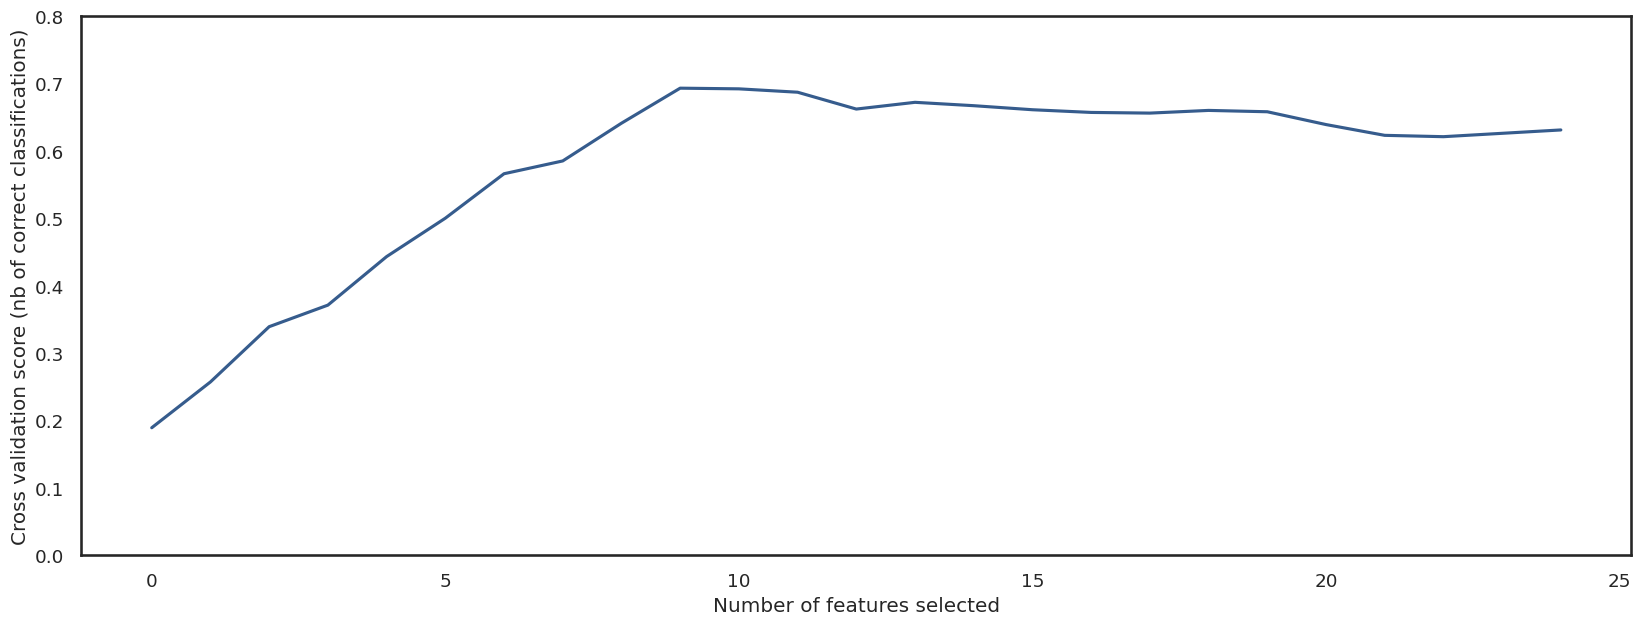

In [ ]:
# Plot number of features VS. cross-validation scores
plt.figure()
ax=plt.gca() #gca = get currant axis
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(1, rfecv.n_features_, rfecv.cv_results_["mean_test_score"])
ax.set_ylim([0, 0.8])
plt.show()

# **Assignment 4**
The following example uses a dataset from a Kaggle competition. <br>
The training set has 250 rows and 302 columns of data. <br>
The example will use RFE to determine which columns (or features) are actually informative.

Your assignment, determine how many features should be kept of the 302 available?

In [ ]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [ ]:
train = pd.read_csv('featureSelectTrain.csv')
test = pd.read_csv('featureSelectTest.csv')

print('Train Shape: ', train.shape)
print('Test Shape: ', test.shape)

train.head()

Train Shape:  (250, 302)
Test Shape:  (19750, 301)


,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


In [ ]:
# prepare for modeling
X_train_df = train.drop(['id', 'target'], axis=1)
y_train = train['target']

X_test = test.drop(['id'], axis=1)

# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)
X_test = scaler.transform(X_test)

In [ ]:
y_train

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
245    1.0
246    0.0
247    0.0
248    1.0
249    0.0
Name: target, Length: 250, dtype: float64

Using the built-in method cumsum, there are 67 rows with the label '1' and 183 with the label '0'

In [ ]:
y_train.cumsum()

0       1.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
245    66.0
246    66.0
247    66.0
248    67.0
249    67.0
Name: target, Length: 250, dtype: float64

Since there are two classes, use logistic regression (classification with two classes) for this dataset.

In [ ]:
lr = LogisticRegression(solver='liblinear')

Use feature extraction to select the 100 most informative features. <br>
Then train the model on these features and get the accuracy scores.

The model with all features selected

In [ ]:
modelLR = lr.fit(X_train, y_train)
modelLR_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='roc_auc')
print('Model Scores: ', modelLR_scores)

Model Scores:  [0.76190476 0.71626984 0.5966736  0.76507277 0.64656965]


**Change the n_features_to_select value to find the optimum number of features to select**

In [ ]:
# feature extraction
#Change the n_features_to_select
rfe = RFE(lr, n_features_to_select=33) #put in number here

# fit on train set
fitm = rfe.fit(X_train, y_train)

# transformed train set
recursive_features = fitm.transform(X_train)

lr_scores = cross_val_score(lr, recursive_features, y_train, cv=5, scoring='roc_auc')
print('LR Scores: ', lr_scores)

LR Scores:  [0.99007937 0.99007937 0.99376299 0.98128898 0.95426195]


In [ ]:
recursive_features.shape

(250, 33)

In [ ]:
selected_featuresModel = lr.fit(recursive_features, y_train)
#selected_featuresModel.coef_[0]

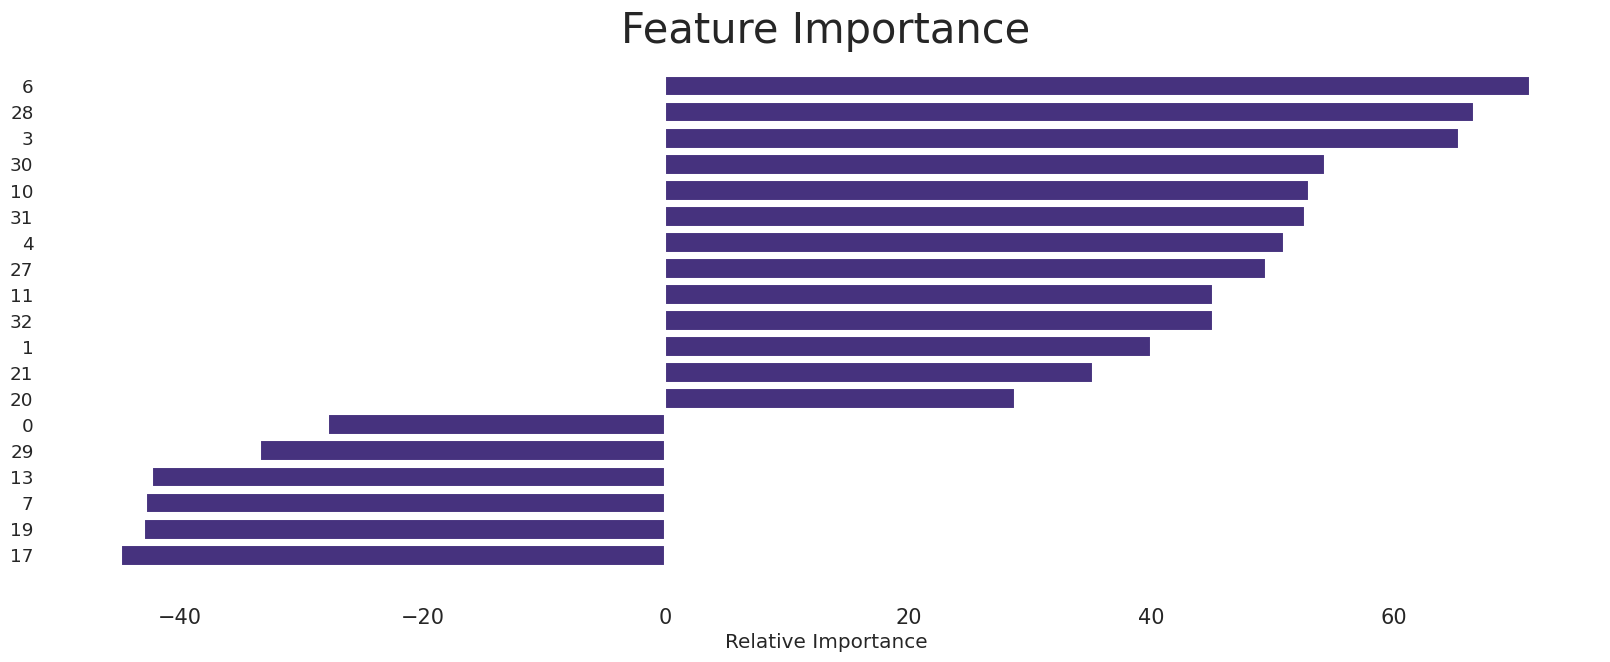

In [ ]:
# checking which are the most important features
feature_importance = selected_featuresModel.coef_[0]
# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-20:-1:1]
pos = np.arange(sorted_idx.shape[0]) + .5
pos.dtype.names
X_train_df.columns[sorted_idx]
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
sns.despine(left=True, bottom=True)
plt.show()

# **SelectFromModel**
SelectFromModel is based on a Machine Learning Model estimation for selecting the features. <br>
The SelectFromModel feature selection is based on the importance attribute threshold. By default, the threshold is the mean.

To use the SelectFromModel feature extraction, you can specify a threshold value. <br>

There are also built-in heuristics for finding a threshold using a string argument. Available heuristics are “mean”, “median” and float multiples of these like “0.1*mean”. <br>

In combination with the threshold criteria, one can use the max_features parameter to set a limit on the number of features to select.

The features that are considered unimportant and removed. <br>
Meaning if the corresponding coef_ or feature_importances_ values are below the provided threshold parameter.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

**Create data**<br>
Four rows with four features

In [ ]:
X3 = [[ 0.87, -1.34,  0.31, -0.99],
     [-2.79, -0.02, -0.85, 0.5 ],
     [-1.34, -0.48, -2.55, 2.01 ],
     [ 1.92,  1.48,  0.65, 0.95 ]]
y3 = [0, 1, 0, 1]

Use SelectFromModel to determine which features are more important<br>
True = important feature<br>
False =  not important feature

In [ ]:
selector = SelectFromModel(estimator=LogisticRegression()).fit(X3, y3)
print("selector estimator coef: ", selector.estimator_.coef_)
print("selector threshold: ",selector.threshold_)
print("selector get support: ",selector.get_support())

selector estimator coef:  [[-0.32308208  0.81794891  0.51921648  0.06107848]]
selector threshold:  0.4303314870543895
selector get support:  [False  True  True False]


In [ ]:
selector.transform(X3)

array([[-1.34,  0.31],
       [-0.02, -0.85],
       [-0.48, -2.55],
       [ 1.48,  0.65]])

#**SelectFromModel using SVM**


**SelectFromModel Example 2** using linear support vector machine and the Iris dataset.


In [ ]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
iris = datasets.load_iris()

Look at the shape and feature names of the data

In [ ]:
X5 = iris.data[:,:]
y5 =iris.target
X5.shape

(150, 4)

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Split the dataset into train and test sets

In [ ]:
X5_train, X5_test, y5_train, y5_test = train_test_split(
    X5, y5, test_size=0.3, random_state=42)

Use a Linear Support vector model and select from the model the best features to keep

In [ ]:
#dual = True when the number of features > the number of rows
#With SVMs and logistic-regression, the parameter C controls the sparsity:
#the smaller C the fewer features selected.
#Penalty specifies the norm used in the penalization.
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False, max_iter=5000).fit(X5_train, y5_train)

#REMOVE THE FEATURES THE ARE UNIMPORTANT
model4 = SelectFromModel(lsvc, prefit=True)
X5_new_train = model4.transform(X5_train)
X5_new_train.shape

(105, 3)

In [ ]:
X5_new_test = model4.transform(X5_test)
X5_new_test.shape

(45, 3)

See which features were kept

In [ ]:
feature_idx= model4.get_support()
feature_idx

array([ True,  True,  True, False])

Train the model on the new feature set

In [ ]:
model5 = lsvc.fit(X5_new_train,y5_train)
model5.score(X5_new_test,y5_test)

0.7111111111111111

Train the model on the full feature set

In [ ]:
model5new = lsvc.fit(X5,y5)
model5new.score(X5,y5)

0.6666666666666666

# **Assignment 5**
Change the ratio of the training and test sets. Run code cells in this example again.<br>
Explain the differences between the two runs of the code. <br>


# **SelectFromModel**

# **Assignment 6**<br>
The Diabetes dataset consists of 10 variables (features) collected from 442 diabetes patients. This example shows how to use SelectFromModel and LassoCv to find the best two features predicting disease progression after one year from the baseline.<br>

When the model is trained on the two best features, the performance drops by ~20%.<br>
Find the number of features that will keep the performance the same, but reduce the size of the model.

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression

Load the data and list the feature names

In [ ]:
diabetes = load_diabetes()
X7 = diabetes.data
y7 = diabetes.target

feature_names = diabetes.feature_names
print(feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Determine which features are important using the LassoCV algorithm

In [ ]:
#LassoCV alogrithm is used with the full data
clf = LassoCV().fit(X7, y7)
importance = np.abs(clf.coef_)
print(importance, "\n")
print(importance.argsort())
#Argsort prints the index values

[  6.49469328 235.99308032 521.7443693  321.0607768  569.43813385
 302.45319289   0.         143.69851474 669.92267515  66.83551067] 

[6 0 9 7 1 5 3 2 4 8]


In [ ]:
idx_third = importance.argsort()[-3]
print(idx_third)
threshold = importance[idx_third] + 0.01

2


To see what features were selected, change the number of features shown.<br>
[:2] will show two features<br>
...<br>
[:9] will show 8 features

In [ ]:
idx_features = (-importance).argsort()[:10]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

Selected features: ['s5' 's1' 'bmi' 'bp' 's2' 'sex' 's4' 's6' 'age' 's3']


The plot shows the importance of each feature. The higher the number the more important the feature

<BarContainer object of 10 artists>

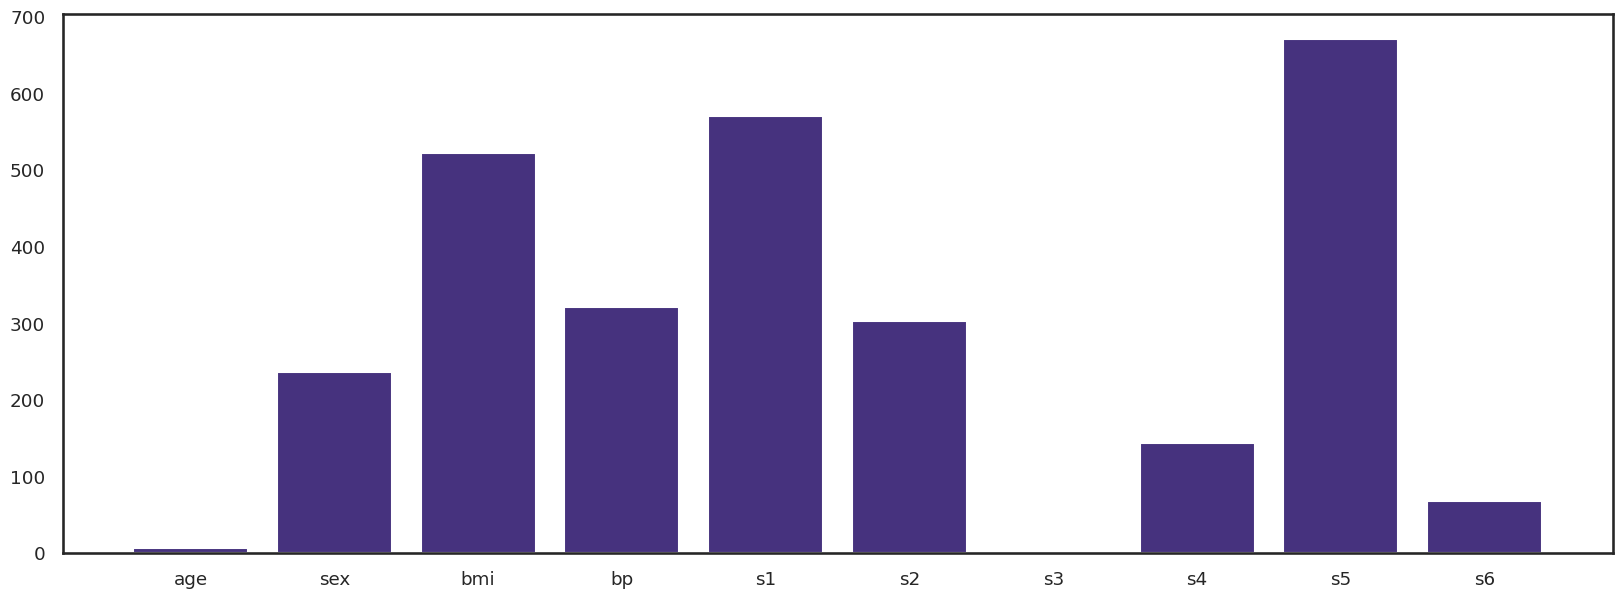

In [ ]:
plt.bar(feature_names,importance)

#**Assignment 7**
Change the threshold of the SelectFromModel alogrithm. <br>
What effect does it have on the performance of the model? <br>
What does it say about the model and/or the data?

Train a classification model on the full feature training data set and then on the select feature training set

In [ ]:
#Use the threshold to selectFromModel
sfm = SelectFromModel(clf, threshold=568)

Below is printed the level of importance for each feature.
Select a new threshold from these importance levels and see how the performance of the model changes.

In [ ]:
print(importance, "\n")

[  6.49469328 235.99308032 521.7443693  321.0607768  569.43813385
 302.45319289   0.         143.69851474 669.92267515  66.83551067] 



In [ ]:
sfm.fit(X7, y7)
X7_transform = sfm.transform(X7)
X7_transform.shape

(442, 2)

Train a linear regression model on all the features.

In [ ]:
model9 = LinearRegression().fit(X7, y7)
model9.score(X7, y7)

0.5177484222203498

Train a linear regression model on the selected features

In [ ]:
model9_new = LinearRegression().fit(X7_transform, y7)
model9_new.score(X7_transform, y7)

0.32887234352066763

# **Tree-based feature selection**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

Load the Iris datset

In [ ]:
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [ ]:
X[1]

array([4.9, 3. , 1.4, 0.2])

Use the trees classifier to determine the important features

In [ ]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_

array([0.06846371, 0.06509287, 0.43701982, 0.4294236 ])

Create a new dataset that uses only the most important features

In [ ]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 2)

In [ ]:
X_new[1]

array([1.4, 0.2])

# **Tree based example 2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

Create synthetic data<br>
>10 features, 3 of them informative


In [ ]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

**Build a forest** and compute the impurity-based feature importances

In [ ]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

**Print the feature ranking**

In [ ]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


**Plot the impurity-based feature importances of the forest**

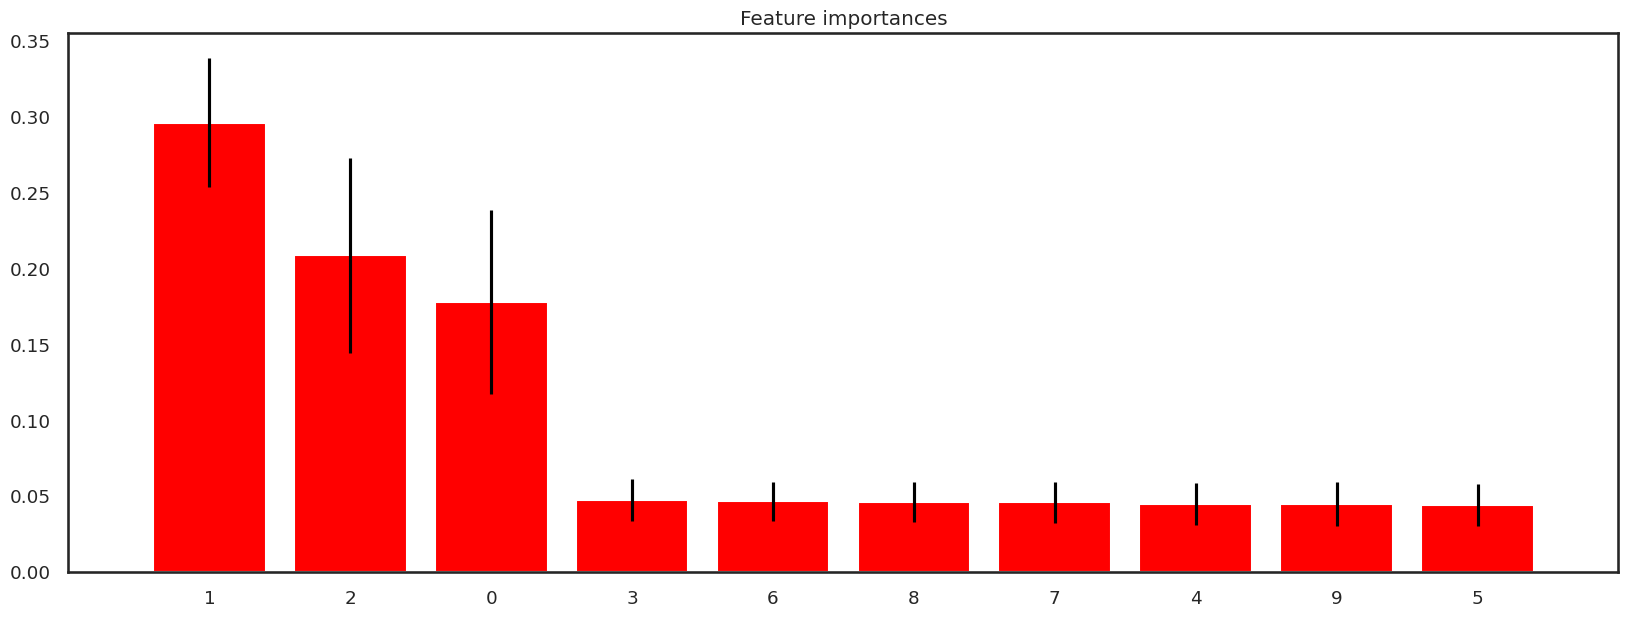

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()